In [ ]:
import numpy as np
from google.colab import files
uploaded = files.upload()
train_dataset=np.load('mytraindata.npy')
test_dataset=np.load('mytestdata.npy')

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVR
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
from io import StringIO
from sklearn import preprocessing
import shutil
import os
from numpy import argmax 
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from IPython.display import Image, display
import matplotlib.pyplot as plt
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel,RBF, ConstantKernel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

Gradient boost technique
after running the next  cell, best parameters for Gradient boosting is printed ,we use those parameters in the next cell to make prediction, then we can run the last two cells for getting the required format for kaggle website.

In [ ]:


# Gradient Boosting
gradboost = GradientBoostingRegressor(random_state = 1)
learning_rates = [0.1, 0.5, 0.75,1]
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
max_depth = [1, 4, 8, 10, 20]
min_samples_split=[1,3,5,8,10]
min_samples_leaf=[1,3,7,10]
max_features=[1,3,6,10]
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split,min_samples_leaf = min_samples_leaf,max_features=max_features,learning_rate=learning_rates)
gridF = GridSearchCV(gradboost, hyperF, cv = 7, verbose = 1, n_jobs = -1)
bestF = gridF.fit(train_dataset[:,1:80], train_dataset[:,80])
best_parameter=bestF.best_estimator_
print(best_parameter)

In [3]:
mygradboost=GradientBoostingRegressor( min_samples_leaf=3,min_samples_split=3,n_estimators=100,max_depth=10,max_features=6,learning_rate=0.1)
mygradboost.fit(train_dataset[:,1:80],train_dataset[:,80])
prediction=mygradboost.predict(test_dataset[:,1:80])

Random Forest technique
after running the next  cell, best parameters for Random Forest are printed ,we use those parameters in the next cell to make prediction, then we can run the last two cells for getting the required format for kaggle website.

In [ ]:
#Random Forest
forest = RandomForestRegressor(random_state = 1)
n_estimators = [10,50,90,130,170]
max_depth = [1,4,8,10,15]
min_samples_split = [1,2,3,4,5]
min_samples_leaf = [ 1,2, 5, 7,10] 
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
gridF = GridSearchCV(forest, hyperF, cv = 7, verbose = 1, n_jobs = -1)
bestF = gridF.fit(train_dataset[:,1:80], train_dataset[:,80])
best_parameter=bestF.best_estimator_
print(best_parameter)

Fitting 7 folds for each of 625 candidates, totalling 4375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    8.6s


In [ ]:
myrandomforrest=RandomForestRegressor( min_samples_leaf=1,min_samples_split=4,n_estimators=50,max_depth=10)
myrandomforrest.fit(train_dataset[:,1:80],train_dataset[:,80])
prediction=myrandomforrest.predict(test_dataset[:,1:80])

SVM technique after running the next cell, best parameters for SVM are printed ,we use those parameters in the next cell to make prediction, then we can run the last two cells for getting the required format for kaggle website.

In [40]:
#SVM
c=[1,2,3,4,5,6,7,8,9,10]
ker=['linear', 'rbf','poly']
parameters = dict(C=c,kernel=ker)
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
bestF=clf.fit(train_dataset[:,1:80],train_dataset[:,80])
best_parameters=bestF.best_estimator_
print(best_parameters)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
mysvm=SVR()
mysvm.fit(train_dataset[:,1:80],train_dataset[:,80])
prediction=mysvm.predict(test_dataset[:,1:80])

next 3 cells are for neural network. to change the architecture,change dimensions of layers in next cell

In [ ]:
#Neural network
class network(nn.Module):
    def __init__(self):
        super(network, self).__init__()

        self.lin = nn.Linear(79, 65536)
        self.drop=nn.Dropout(p=0.2)
        self.lin3=nn.Linear(65536,1)
        
        
    def forward(self, x):
        x=F.relu(self.lin(x))
        x=self.drop(x)
        x=(self.lin3(x))      
        return x

In [ ]:
criterion = torch.nn.MSELoss

# run on GPU if possible
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
batch_size = 256
model=network().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

max_epochs=500
totalloss=0
minloss=float('inf')


my_loader = torch.utils.data.DataLoader(train_dataset[0:1400,1:80],batch_size)
mytargetloader=torch.utils.data.DataLoader(train_dataset[0:1400,80],batch_size)

my_loader_test = torch.utils.data.DataLoader(train_dataset[1400:,1:80],batch_size)
mytargetloader_test=torch.utils.data.DataLoader(train_dataset[1400:,80],batch_size)
  
for i in range(max_epochs):
  if(totalloss<minloss and i>0):
    torch.save(model, 'best_model.pt')
    minloss=totalloss
  
  totalloss=0

  for idx,(data,target) in enumerate(zip(my_loader,mytargetloader)):
    data = data.to(device).float()   
    target=target.to(device).float()
    optimizer.zero_grad()
    predicted_batch = model(data)

    loss = criterion()(predicted_batch, target.reshape((-1,1)))
    loss.backward() 
    optimizer.step()
  
  for idx,(datat,targett) in enumerate(zip(my_loader_test,mytargetloader_test)):
    datat = datat.to(device).float()   
    targett=targett.to(device).float()
    predicted_batcht = model(datat)
    loss2 = criterion()(predicted_batcht, targett.reshape((-1,1)))
    totalloss+=loss2.item()
  
  print(str(i)+" "+str(totalloss))
print(minloss)

In [ ]:
criterion3 = torch.nn.MSELoss
# run on GPU if possible
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
batch_size = 128
myfinalmodel = torch.load('best_model.pt')
myfinalmodel.eval()
myfinalloader1=torch.utils.data.DataLoader(test_dataset[:,1:80], batch_size)
final_prediction=np.zeros((len(test_dataset),1))
j=0

with torch.no_grad(): 
  for idx,(data1f) in enumerate((myfinalloader1)):
    data1f = data1f.to(device).float()   
    predicted_batchf = myfinalmodel(data1f)
    for k in range(len(predicted_batchf)):
      final_prediction[j][0]=predicted_batchf[k]
      j+=1

print(final_prediction.shape)
prediction=final_prediction

Gaussian processs, taken from my own submission for assignment 3 where we used identity and polynomial kernels

In [24]:
#Gaussian Process
def predict_gaussian_process(inputs, posterior):

  mean = np.zeros(inputs.shape[0])
  variance = np.zeros(inputs.shape[0])
  mean,variance=posterior(inputs) 
  return mean, variance

def eval_gaussian_process(inputs, posterior, targets):
  mean_squared_error = 0
  predicted_mean_values,predicted_variance=predict_gaussian_process(inputs, posterior)
  diff=predicted_mean_values-targets
  mean_squared_error =(diff**2).mean(axis=0)
  return mean_squared_error


def train_gaussian_process(train_inputs, train_targets, measurement_variance, kernel, kernel_param):
  inverse_regularized_gram_matrix = np.zeros((train_inputs.shape[0],train_inputs.shape[0]))
  K=kernel(train_inputs,train_inputs,kernel_param)
  I=np.eye(train_inputs.shape[0])
  inverse_regularized_gram_matrix=np.linalg.inv(K+measurement_variance*I)

  def posterior(inputs, train_inputs=train_inputs, train_targets=train_targets, inverse_regularized_gram_matrix=inverse_regularized_gram_matrix, kernel=kernel):

    mean = np.zeros(inputs.shape[0])
    mean=(kernel(inputs,train_inputs,kernel_param).dot(inverse_regularized_gram_matrix)).dot(train_targets)
    variance = np.zeros(inputs.shape[0])
    variance=kernel(inputs,inputs,kernel_param)+measurement_variance*np.eye(len(inputs))-(kernel(inputs,train_inputs,kernel_param).dot(inverse_regularized_gram_matrix)).dot(kernel(train_inputs,inputs,kernel_param))
    return mean, variance

  return posterior

def identity_kernel(inputs1,inputs2,dummy_param=None):
  gram_matrix = np.zeros((inputs1.shape[0],inputs2.shape[0]))
  gram_matrix=inputs1.dot(inputs2.transpose())
  return gram_matrix

def polynomial_kernel(inputs1,inputs2,degree):
  gram_matrix = np.zeros((inputs1.shape[0],inputs2.shape[0]))
  gram_matrix=((inputs1.dot(inputs2.transpose())+1)**degree)
  return gram_matrix



def cross_validation_gaussian_process(k_folds, kernel, hyperparameters, inputs, targets, measurement_variance):

  best_hyperparam = 0
  best_mean_squared_error = 0
  mean_squared_errors = np.zeros(len(hyperparameters))

  j=0
  data_length = len(inputs)
  interval_length = data_length // k_folds
  for a in hyperparameters:
    sum_MSE = 0
    for i in range(k_folds):
      start_index = i * interval_length
      train_inputs = np.concatenate((inputs[0:start_index], inputs[start_index + interval_length:]))
      train_targets = np.concatenate((targets[0:start_index], targets[start_index + interval_length:]))
      myposterior=train_gaussian_process(train_inputs, train_targets, measurement_variance, kernel, a)
      sum_MSE+=eval_gaussian_process(inputs[start_index:start_index+interval_length], myposterior, targets[start_index:start_index+interval_length])
      
    mean_squared_errors[j] = (sum_MSE/k_folds)
    j+=1

  best_mean_squared_error = float("inf")
  for k in range(len(hyperparameters)):
    if(best_mean_squared_error>mean_squared_errors[k]):
      best_mean_squared_error=mean_squared_errors[k]
      best_hyperparam=hyperparameters[k]
  return best_hyperparam, best_mean_squared_error, mean_squared_errors

In [ ]:
train_inputs=train_dataset[:,1:80]
train_targets=train_dataset[:,80]
test_inputs=test_dataset[:,1:80]
measurement_variance = 1
k_folds = 10

# identity kernel
posterior = train_gaussian_process(train_inputs, train_targets, measurement_variance, identity_kernel, None)
mean,var=predict_gaussian_process(test_inputs, posterior)

# polynomial kernel

hyperparams = range(1,21)
best_degree, best_mean_squared_error, mean_squared_errors = cross_validation_gaussian_process(k_folds,polynomial_kernel,hyperparams,train_inputs,train_targets,measurement_variance)
print('best degree: ' + str (best_degree))
posterior = train_gaussian_process(train_inputs, train_targets, measurement_variance, polynomial_kernel, best_degree)
mean,var=predict_gaussian_process(test_inputs, posterior)




In [ ]:
prediction=mean

In [27]:
kernel=ConstantKernel()+DotProduct()
gpr = GaussianProcessRegressor(kernel=kernel, alpha=5,random_state=0).fit(train_dataset[:,1:80], train_dataset[:,80])
prediction=gpr.predict(test_dataset[:,1:80])

linear  regression tuning

111
range(1, 200)


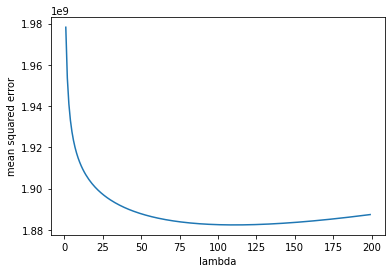

In [36]:
#linear regression

list_mse=[]
bestb=1
bestmse=float('inf')
for b in range(1,200):
 reg = linear_model.Ridge(alpha=b)
 reg.fit(train_dataset[0:1000,1:80],train_dataset[0:1000,80])
 predict=reg.predict(train_dataset[1000:,1:80])
 mse=mean_squared_error(train_dataset[1000:,80],predict)
 list_mse.append(mse)
 if(mse<bestmse):
   bestmse=mse
   bestb=b
print(bestb)
def plot_linear_regression_mean_squared_errors(mean_squared_errors,hyperparams):
  plt.plot(hyperparams,mean_squared_errors)
  plt.ylabel('mean squared error')
  plt.xlabel('lambda')
  plt.show()
hyperparams=range(1,200)
print(hyperparams)
import matplotlib.pyplot as plt
plot_linear_regression_mean_squared_errors(list_mse,hyperparams)

reg = linear_model.Ridge(alpha=bestb)
reg.fit(train_dataset[:,1:80],train_dataset[:,80])
weights=reg.coef_
prediction=reg.predict(test_dataset[:,1:80])

regardless of used model for prediction, the next two cells provide prediction in desired format of kaggle website

In [28]:
import csv
with open('prediction.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Id', 'SalePrice'])
    for i in range(len(test_dataset)):
      writer.writerow([test_dataset[i][0].astype(int),prediction[i]])

In [29]:
from google.colab import files
files.download("prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>